# Neural network model

## Neural network layer

-The fundamental building block of most modern neural network.

- You put together a lot of layers, and form a neural network.

- A layer is composed by a number of neurons.




Remember

$a =$ activation value

$g =$ sigmoid function or activation function

$$a = g(w \cdot x + b )$$
with x being the input values, w and b the parameters of the neuron.

this is the familiar $z$ value

This is the familiar logistic function:
$$ g(z) = \frac{1}{1 + e^{-(z)}}$$

- Every neuron will output some activation values. Based on its parameters.

- The activation values of each neuron, are the outputs of the layer. And they become the input of the next layer. 


Notation for layer numbering

$a^{[1]}_{1}$ - This refers to the **first** neuron of the **first** layer.

$a^{[2]}_{1} -$ This refers to the **first** neuron of the **second** layer.

$a^{[1]}_{2}$ - This refers to the **second** neuron of the **first** layer.


<br>

After you obtain the final value of the neural network, you can define a threshold to predict a category.
Example:

$a^[2] = 0.84$

Threshold: is $a^[2] \geq 0.5$

if yes: $y = 1$ 

if not: $y = 0$


## More complex Neural Networks

Layer 0 - input layer

The convention is not to count the input layer. So a neural network that has one input layer, 3 hidden layers and one output layer, has a total of four layers.

unit == neuron


**Notation**

$$a^{[l]}_j = g(\vec{w}^{[l]}_j \cdot \vec{a}^{[l-1]} + b^{[l]}_j)$$

Activations of any neuron of a layer, given the input that it receives.

<br>



## Inference: making predictions (forward propagation)


### Handwritten digit recognition

Take only the digits 1 and 0. Binary classification. 

A matrix of a 8x8 image of a number 1 would look like these:

| 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 255 | 255 | 255 | 0 | 255 | 255 | 255 | 255 | 
| 255 | 255 | 0 | 0 | 255 | 255 | 255 | 255 | 
| 255 | 255 | 255 | 0 | 255 | 255 | 255 | 255 | 
| 255 | 255 | 255 | 0 | 255 | 255 | 255 | 255 | 
| 255 | 255 | 255 | 0 | 255 | 255 | 255 | 255 | 
| 255 | 255 | 0 | 0 | 0 | 255 | 255 | 255 | 
| 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 |

0 - black
255 - white

Given this 64 input features (each number), we are going to implement a two hidden layer neural network.

- The first hidden layer has 25 neurons or units. 

- The send one has 15 neurons. 

- The output of the output layer is going to be the propability of being a handwritten "1"


**Forward propagation** - the computation goes from left to right, from x to $a^{[3]}$. You're propagating the activations of the neurons. 

**Backward propagation** - used for learning. 

- Its also typical of the neural architecture to decrease the number of units, as you get closer to the output layer. The first layer tends to have more units. 






# Lab 01 - Neurons and layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


## Neuron activation - Regression/Linear Model

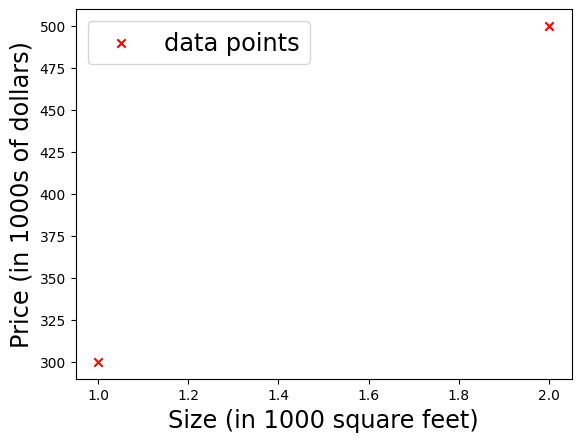

In [10]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32) #size in 1000 square feet
Y_train = np.array([[300.0], [500.0]], dtype=np.float32) #price in 1000's of dollars

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', color='r', label='data points')
ax.legend(fontsize= "xx-large")
ax.set_ylabel('Price (in 1000s of dollars)', fontsize= "xx-large")
ax.set_xlabel('Size (in 1000 square feet)', fontsize= "xx-large")
plt.show()

## Regression/linear Model

The function implementes by a neuron with no activation is the same as in linear regression:

$$f_w,b (x^{(i)}) = w \cdot x^{(i)} + b$$

we can define a layer with one neuron or unit and compare it to the familiar linear regression function:

In [11]:
linear_layer= tf.keras.layers.Dense(units=1, activation="linear")

linear_layer.get_weights()

[]

In [12]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.1763622]], shape=(1, 1), dtype=float32)


The result is a **tensor** (another name for an array) with shape (1,1) or one entry.

Let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero. 

In [13]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

w = [[1.1763622]], b = [0.]


A linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of out linear_layer above.


In [14]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [16]:
## lets compare equation (1) to the layer output

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values! Now, we can use our linear layer, to make predictions in out training data.

In [22]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
print (prediction_tf)
print (prediction_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]
